## Web scrapping

In [ ]:
!pip install webdriver_manager

In [ ]:
!pip install selenium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('otomoto.py','wb').write(src)
import otomoto

In [ ]:
import pandas as pd
import numpy as np
import datetime
import time
import re


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# url = 'https://www.autotrader.com/cars-for-sale/Used+Cars/GMC/Yukon/Abilene+TX-79606?maxMileage=100000&makeCodeList=GMC&listingTypes=USED&searchRadius=0&modelCodeList=YUKON&zip=79606&startYear=2015&endYear=2017&marketExtension=true&sortBy=relevance&numRecords=25&firstRecord={page_num}'
url = 'https://www.otomoto.pl/osobowe/volvo/s60?search%5Bfilter_enum_generation%5D=gen-ii-2010-s60&search%5Bfilter_enum_damaged%5D=0&search%5Border%5D=created_at_first%3Adesc&page={page_num}'
page_num = 1

In [ ]:
a = Otomoto(url = url)
a.getAllPagesData(max_page=9)

## Save the scraped data as a local CSV

In [ ]:
a.df.to_csv('car_data.csv')

## Reload the data from the local CSV

In [159]:
df = pd.read_csv('car_data.csv')

In [160]:
df.head()

,Unnamed: 0,name,price,year,mileage,localization,engine_capacity
0,0,Volvo S60 D3 Momentum,45 500 PLN,2010,106 430 km,Gąsawy (Wielkopolskie),1 984 cm3
1,1,Volvo S60,46 000 PLN,2013,169 725 km,Poznań (Wielkopolskie),2 400 cm3
2,2,Volvo S60 D4 R-Design,43 000 PLN,2012,224 000 km,Chłapowo (Pomorskie),1 984 cm3
3,3,Volvo S60,45 500 PLN,2014,213 000 km,Oborniki (Wielkopolskie),1 560 cm3
4,4,Volvo S60,79 000 PLN,2017,109 000 km,Lublin (Lubelskie),1 969 cm3


In [161]:
df.dtypes

Unnamed: 0          int64
name               object
price              object
year                int64
mileage            object
localization       object
engine_capacity    object
dtype: object

In [162]:
df = df.dropna()

In [163]:
df.price  = df.price.apply(lambda x: str(x)[:-4].replace(" ", "")).apply(pd.to_numeric)
df.mileage = df.mileage.apply(lambda x: str(x)[:-2].replace(" ", "")).apply(pd.to_numeric)
df.year = df.year.astype('str')
df.engine_capacity = df.engine_capacity.apply(lambda x: str(x)[:-4].replace(" ", "")).apply(pd.to_numeric)
df = df.astype({'name':'string'})
df = df.astype({'localization':'string'})

<ipython-input-163-6623a977cf9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price  = df.price.apply(lambda x: str(x)[:-4].replace(" ", "")).apply(pd.to_numeric)
<ipython-input-163-6623a977cf9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.mileage = df.mileage.apply(lambda x: str(x)[:-2].replace(" ", "")).apply(pd.to_numeric)
<ipython-input-163-6623a977cf9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [164]:
def get_regex_item(name, pattern):
    item = re.search(pattern, name)
    if item is None:
        return None
    else:
        return item.group()

In [165]:
df['awd'] = df.name.apply(lambda x: 1 if get_regex_item(x, pattern= r'AWD') else 0)
df['type'] = df.name.apply(lambda x: get_regex_item(x, pattern= r'(?:^|(?<= ))(R-Design|Momentum|Summum|Kinetic)(?:(?= )|$)') if get_regex_item(x, pattern= r'(?:^|(?<= ))(R-Design|Momentum|Summum|Kinetic)(?:(?= )|$)') else "")

In [166]:
df = df.drop(columns='Unnamed: 0')

In [167]:
df.head(20)

,name,price,year,mileage,localization,engine_capacity,awd,type
0,Volvo S60 D3 Momentum,45500,2010,106430,Gąsawy (Wielkopolskie),1984,0,Momentum
1,Volvo S60,46000,2013,169725,Poznań (Wielkopolskie),2400,0,
2,Volvo S60 D4 R-Design,43000,2012,224000,Chłapowo (Pomorskie),1984,0,R-Design
3,Volvo S60,45500,2014,213000,Oborniki (Wielkopolskie),1560,0,
4,Volvo S60,79000,2017,109000,Lublin (Lubelskie),1969,0,
5,Volvo S60,35900,2012,178000,Bydgoszcz (Kujawsko-pomorskie),1560,0,
6,Volvo S60 DRIVe,37500,2014,213000,Września (Wielkopolskie),1560,0,
7,Volvo S60 D4 Drive-E Momentum,62900,2016,230000,Kamienica (Opolskie),1969,0,Momentum
8,Volvo S60 D3 Geartronic Momentum,36500,2012,234300,Kraków (Małopolskie),1984,0,Momentum
9,Volvo S60,60000,2014,152924,Bielany Wrocławskie (Dolnośląskie),1969,0,


In [204]:
df.groupby('type')['price'].mean()

type
            55777.804511
Kinetic     48314.450000
Momentum    49912.870968
R-Design    63294.034483
Summum      55028.370370
Name: price, dtype: float64

<Axes: xlabel='type', ylabel='price'>

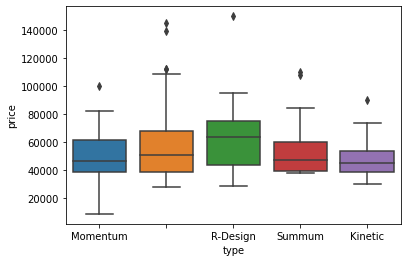

In [205]:
sns.boxplot(df, x=df.type, y=df.price)

<Axes: xlabel='year', ylabel='price'>

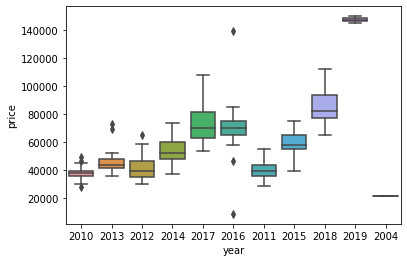

In [206]:
sns.boxplot(df, x=df.year, y=df.price)

In [169]:
model_df = pd.get_dummies(data=df[['price', 'mileage', 'awd', 'year', 'type']], drop_first = True)
# model_df = df[['price', 'mileage', 'awd', 'year', 'type']]

In [170]:
model_df.head(5)

,price,mileage,awd,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,type_Kinetic,type_Momentum,type_R-Design,type_Summum
0,45500,106430,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,46000,169725,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,43000,224000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,45500,213000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,79000,109000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


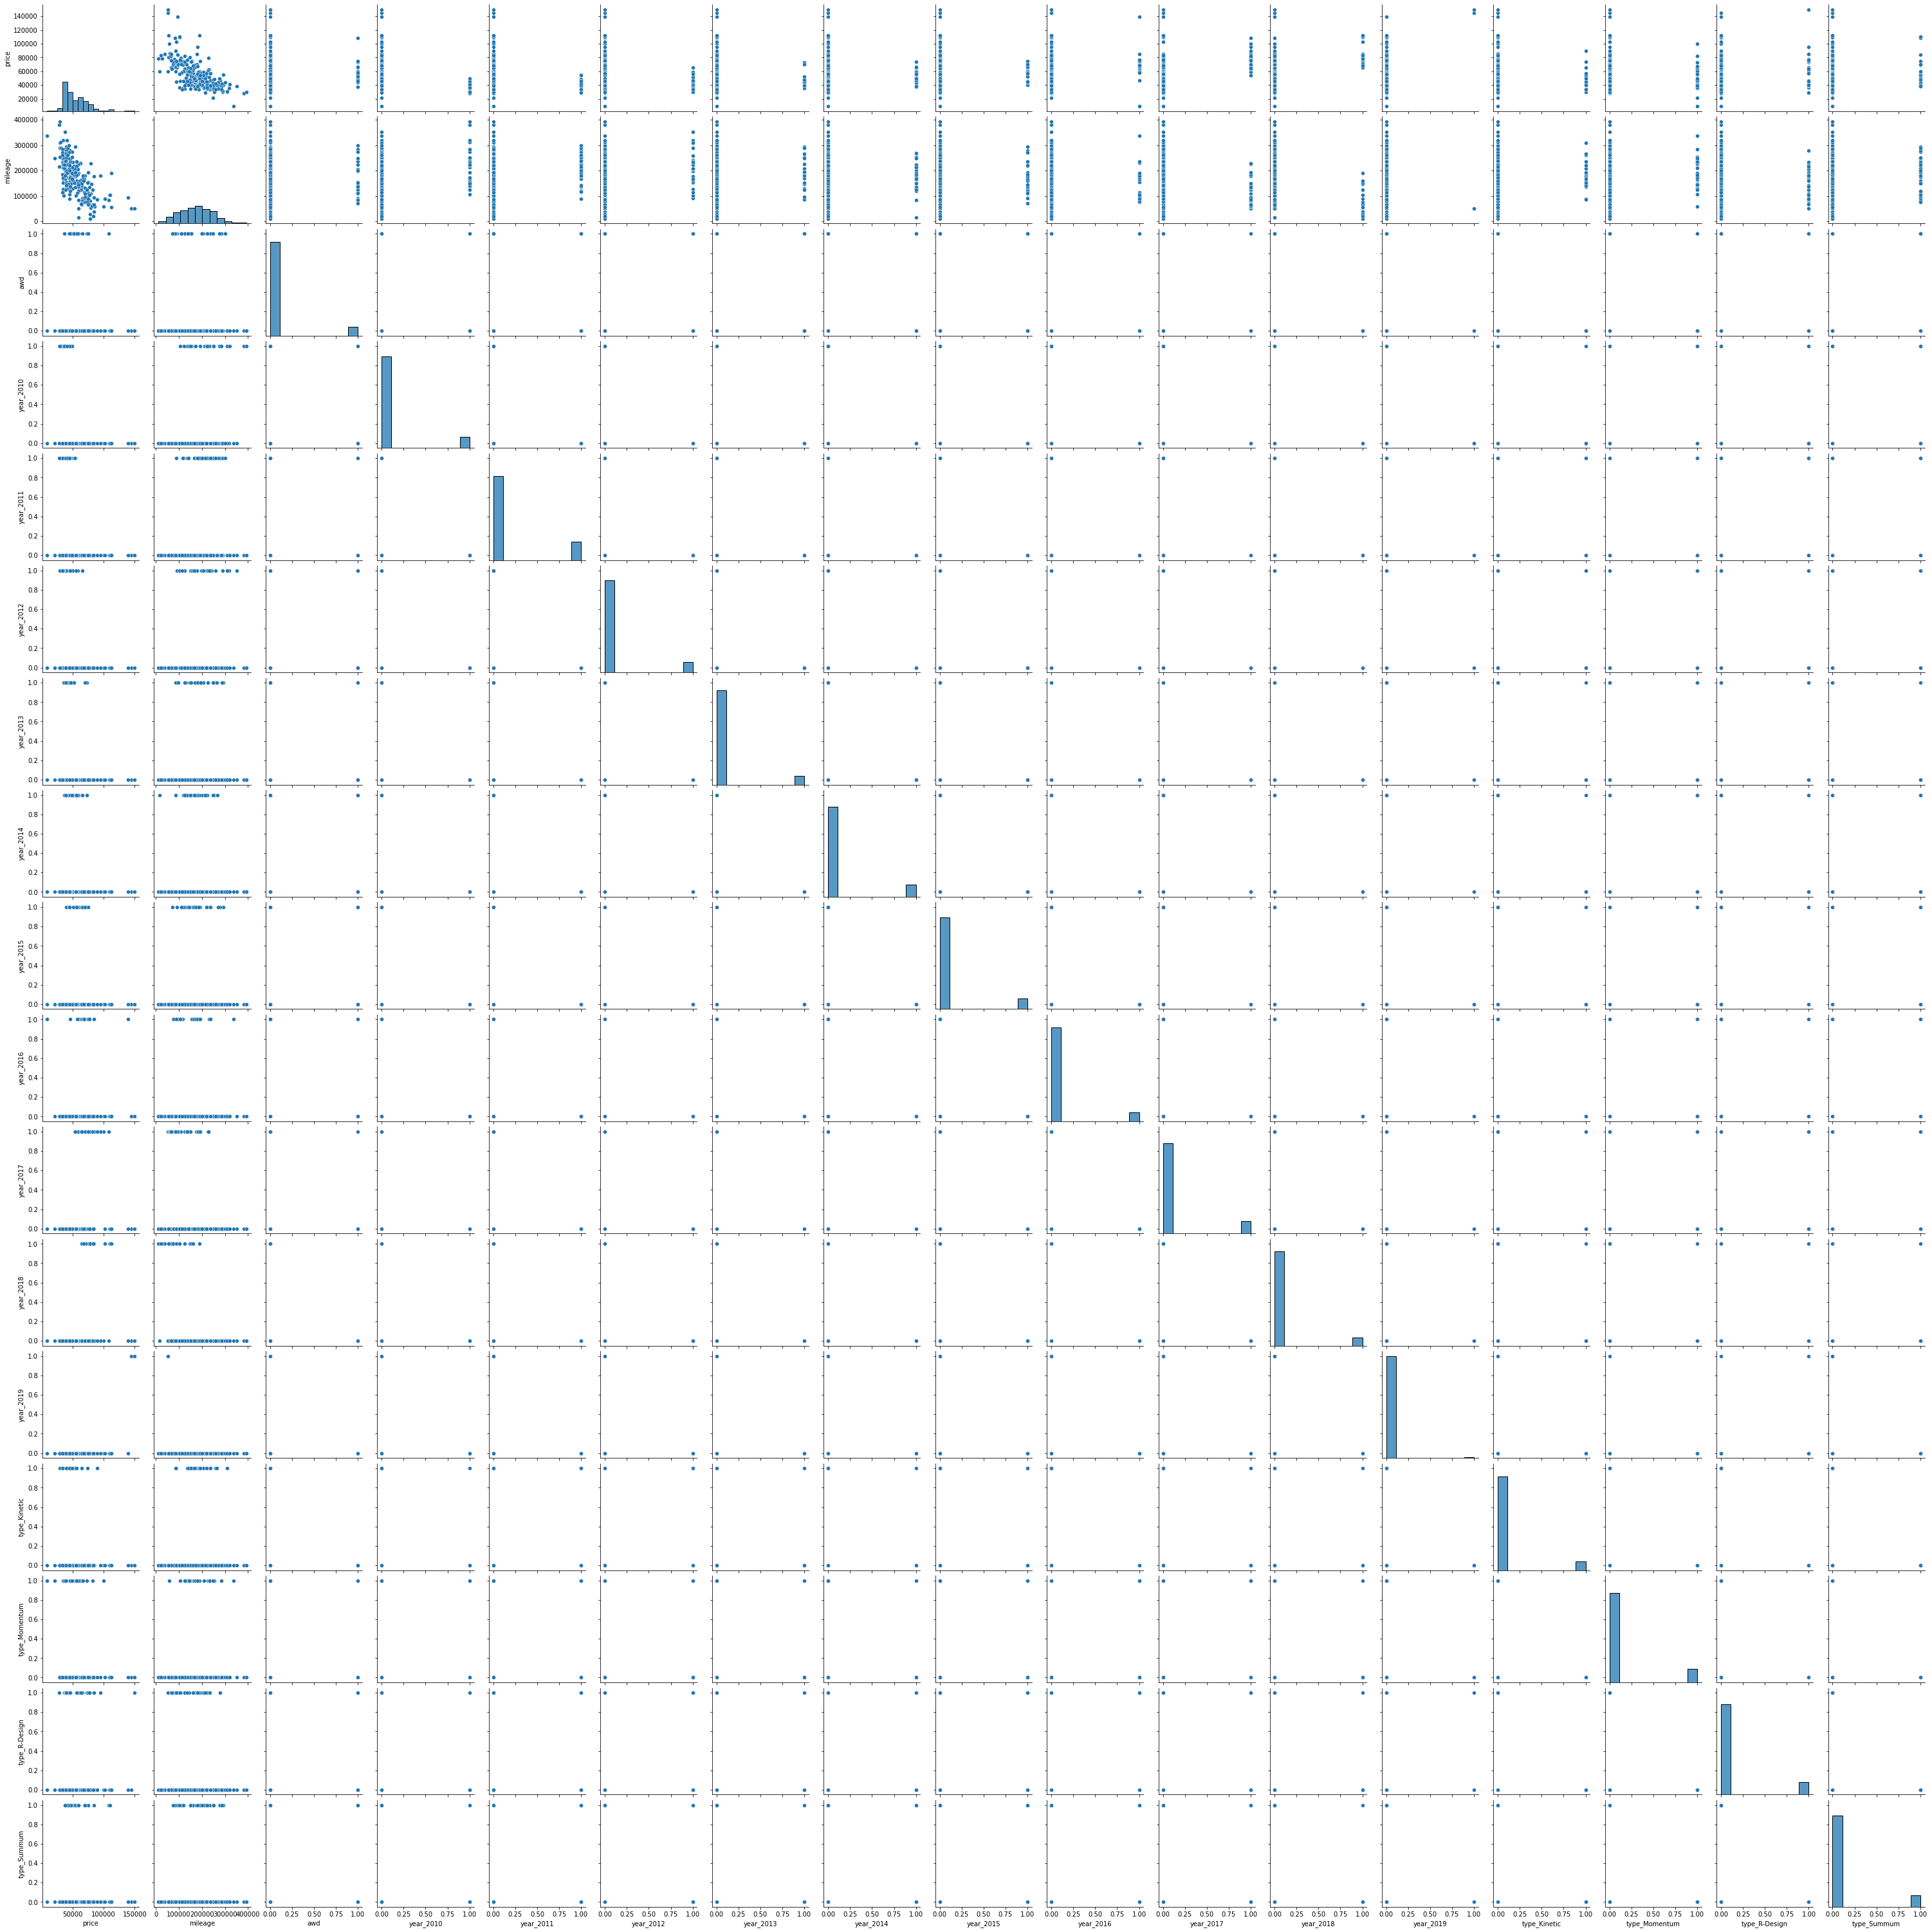

In [171]:
# sns.pairplot(model_df)

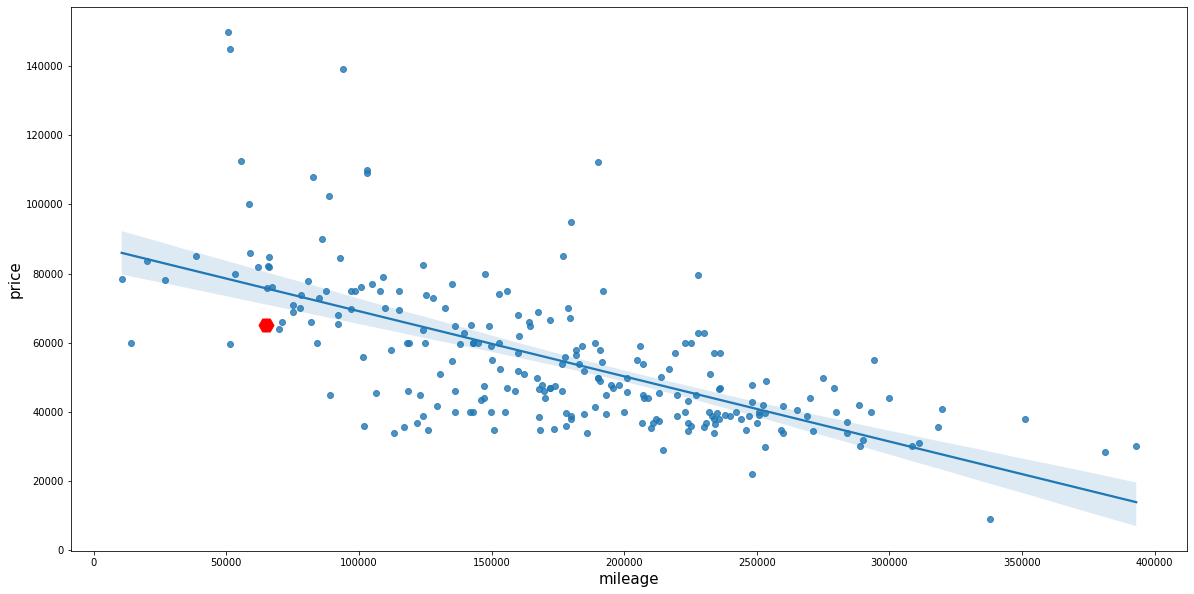

In [189]:
highlight = 186

fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_ylabel("Price", fontsize=15)
ax1.set_xlabel("Mileage", fontsize=15)
sns.regplot(x=df.mileage, y=df.price, )
plt.plot(df.loc[highlight].mileage, df.loc[highlight].price, marker='H', markersize=15, color='red', )

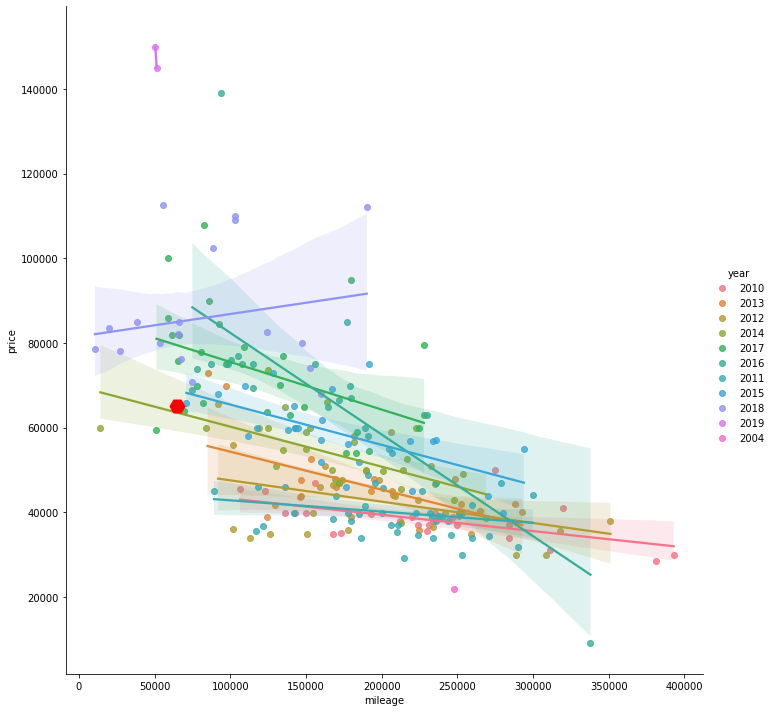

In [191]:
ax1.set_ylabel("Price", fontsize=15)
ax1.set_xlabel("Mileage", fontsize=15)
sns.lmplot(x='mileage', y='price', data = df,  hue='year', height=10)
plt.plot(df.loc[highlight].mileage, df.loc[highlight].price, marker='H', markersize=15, color='red')

In [175]:
y = model_df.price
X = model_df.drop(columns='price')

In [176]:
# model = LinearRegression().fit(X=X, y=y)

In [177]:
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     51.06
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.83e-65
Time:                        10:40:56   Log-Likelihood:                -2540.3
No. Observations:                 240   AIC:                             5115.
Df Residuals:                     223   BIC:                             5174.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.032e+04   1.05e+04      3.851

In [178]:
model_df['predict'] = model.predict()
model_df['diff'] = model_df.price - model_df.predict

In [194]:
# fig, ax = plt.subplots(figsize=(12,8))
# fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


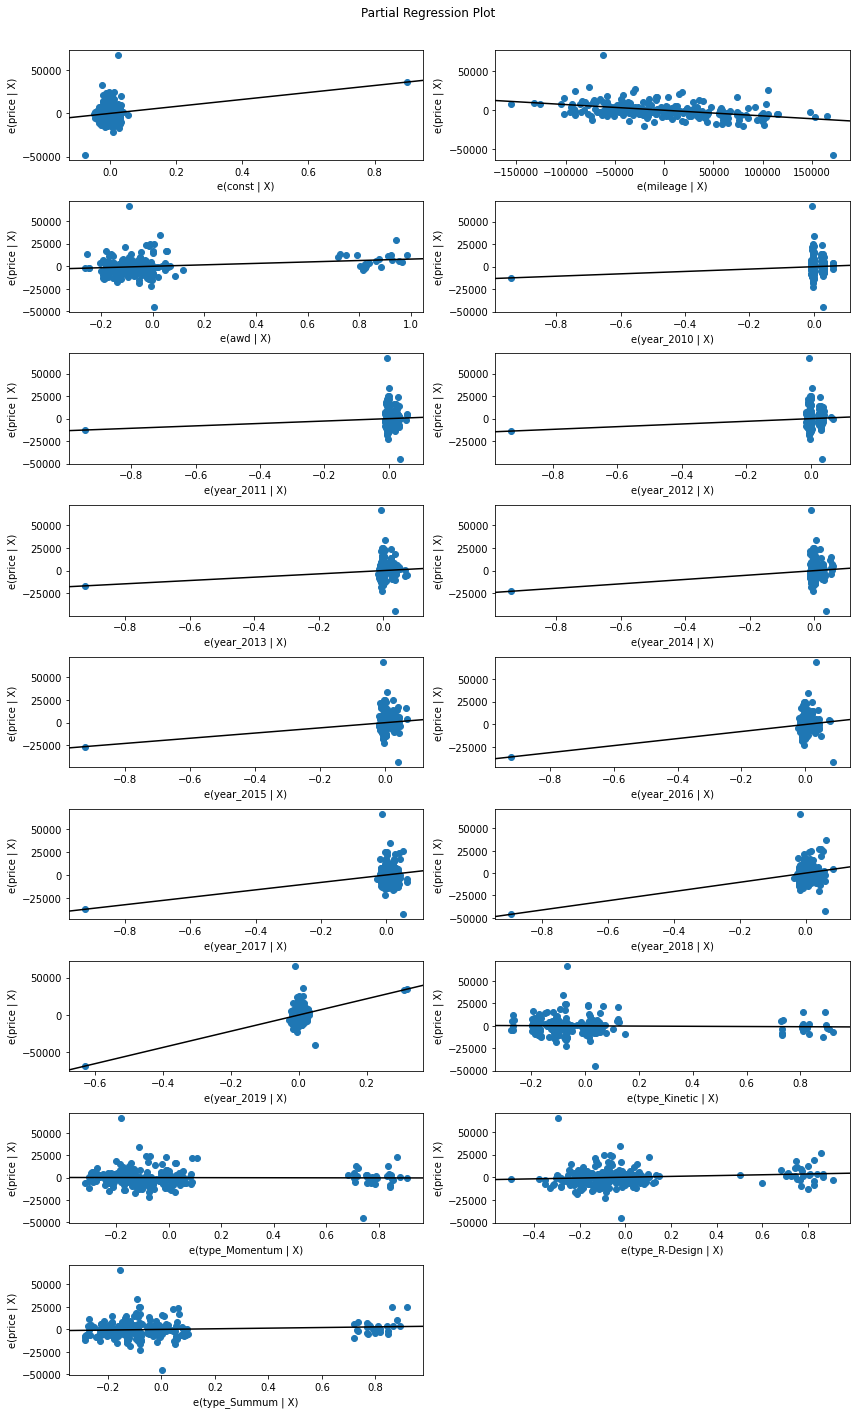

In [195]:
fig = plt.figure(figsize=(12,20))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [183]:
predict_df = pd.DataFrame(
    
    {'price': 32495
     , 'constant': 1
     , 'mileage': 71358
     , 'awd': 0
     , 'year_2010': 0
     , 'year_2011': 0
     , 'year_2012': 0
     , 'year_2013': 0
     , 'year_2014': 0
     , 'year_2015': 0
     , 'year_2016': 0
     , 'year_2017': 0
     , 'year_2018': 0
     , 'year_2019': 0
     , 'type_Kinetic': 1
     , 'type_Momentum': 1
     , 'type_R-Design': 1
     , 'type_Summum': 0
    }
    , index=[0]


)

predict_df['predict'] = model.predict(predict_df[['constant', 'mileage', 'awd', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'type_Kinetic', 'type_Momentum' , 'type_R-Design', 'type_Summum']])
predict_df['diff'] = predict_df.price - predict_df.predict
predict_df

,price,constant,mileage,awd,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,type_Kinetic,type_Momentum,type_R-Design,type_Summum,predict,diff
0,32495,1,71358,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,38069.461535,-5574.461535


In [184]:
model_df.sort_values('diff', ascending=True).head(30)

,price,mileage,awd,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,type_Kinetic,type_Momentum,type_R-Design,type_Summum,predict,diff
149,9000,338000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,53914.563621,-44914.563621
186,65000,65000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,87128.976348,-22128.976348
71,59500,51280,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,77130.093402,-17630.093402
195,63900,69720,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,80278.401515,-16378.401515
191,70800,75000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,86401.107762,-15601.107762
100,46900,236000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,61706.363281,-14806.363281
58,53900,176466,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,68018.197710,-14118.197710
129,53900,183000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,67542.608376,-13642.608376
225,29100,214669,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,42599.718235,-13499.718235
239,33900,113180,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,46914.714651,-13014.714651


In [186]:
df.loc[186]

name                               Volvo S60
price                                  65000
year                                    2018
mileage                                65000
localization       Ostrowite (Wielkopolskie)
engine_capacity                         1969
awd                                        0
type                                        
Name: 186, dtype: object

In [187]:
print('aic', model.aic)
print('bic', model.bic)
print('rmse', sm.tools.eval_measures.rmse(model_df.predict, model_df.price))

aic 5114.558790242257
bic 5173.72965193907
rmse 9562.064613335842
